In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as oneHot
from logistic_regression2 import logistic_regression as lr
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

W0707 19:43:01.439122 139764913035072 deprecation_wrapper.py:119] From /home/jahan/Documents/algorithms/logistic_regression2.py:3: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.



In [2]:
x_train, x_test = x_train.reshape(60000,28*28) / 255.0, x_test.reshape(10000,28*28) / 255.0
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
onehot = oneHot()
onehot.fit(y_train)
y_train = onehot.transform(y_train).toarray()
y_test = onehot.transform(y_test).toarray()

/home/jahan/miniconda3/envs/ml_cpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
logistic = lr(x_train,y_train)

True


In [4]:
costs, accuracies = logistic.train(30)

Epoch: 0  Cost: 2.302599  AUC: 0.5
Epoch: 10  Cost: 1.8461612  AUC: 0.93929595
Epoch: 20  Cost: 1.495948  AUC: 0.96245635


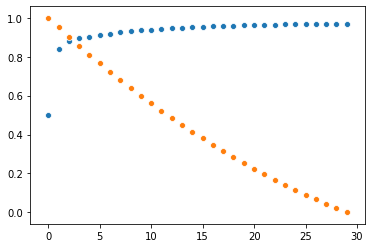

In [5]:
sns.scatterplot(np.arange(0,len(accuracies),1),accuracies)
sns.scatterplot(np.arange(0,len(costs),1),(costs-np.min(costs))/(np.max(costs)-np.min(costs)))

In [6]:
y_pred, AUC = logistic.predict(x=x_test,y=y_test)
print(AUC)

0.9720214
